# Build Computations

There are two ways to build logical computations that can be used in `tqec`:

1. Build the computation interactively with [SketchUp](https://www.sketchup.com/app).
2. Use the data structures provided by `tqec` to build the computation programmatically.

In this notebook, we will guide you through both methods.

## Use SketchUp

[SketchUp](https://www.sketchup.com/app) is a 3D modeling tool widely used in QEC community to build the spacetime diagram for logical computations. Its user-friendly interface allows you to easily create and manipulate the computation blocks. 

Once you make a Trimble account, you may freely use the web version of SketchUp to import a `.skp` file and create a scene. However, unless you are on a Windows machine, you must either activate a paid license or free trial to export a SketchUp `.skp` file as a COLLADA `.dae` file. On Windows, it suffices to use the [freeware version SketchUp8](https://google-sketchup.en.lo4d.com/download). 

Users that are not on Windows may fully use `tqec` via the programmatic construction below. Please notify a developer if you are aware of a way to export a SketchUp scene to a `.dae` file on Mac OSX or Linux.

The workflow using SketchUp to build computations is as follows:

1. Open the [template file](https://github.com/tqec/tqec/blob/main/assets/template.skp) in SketchUp.
2. Use the building blocks provided in the template file to build your computation. After you finish building, remove the template blocks from the scene.
3. Save and export the model to `.dae` file format.
4. Import the computation into `tqec` using the `tqec.read_block_graph_from_dae_file` function.

## Programmatic Construction

To build more large-scale computations or you cannot have access to SketchUp, you can use the data structures provided by `tqec` to build the computation programmatically. Currently, `tqec` provides two data structures to represent computations and you can call the methods on them to build the computation:

1. `ZXGraph`: A ZX-diagram representation from the ZX-calculus.
2. `BlockGraph`: An exact correspondence to the spacetime diagram representation that can be built in SketchUp.

They are both represented as graphs internally and can be built by adding nodes and edges to them. Here we show how to build a logical CNOT with both `ZXGraph` and `BlockGraph`.

### `ZXGraph`

(<Figure size 500x600 with 1 Axes>,
 <Axes3D: title={'center': 'Logical CNOT ZX Graph'}>)

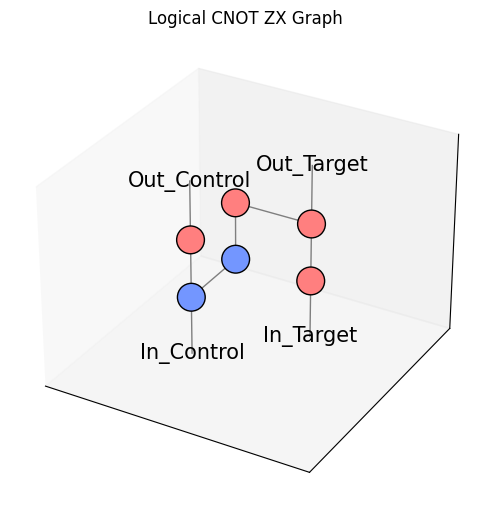

In [4]:
from tqec import ZXGraph, ZXNode, ZXKind, Position3D

g_zx = ZXGraph("Logical CNOT ZX Graph")
g_zx.add_edge(
    ZXNode(Position3D(0, 0, 0), ZXKind.P, "In_Control"),
    ZXNode(Position3D(0, 0, 1), ZXKind.Z),
)
g_zx.add_edge(
    ZXNode(Position3D(0, 0, 1), ZXKind.Z),
    ZXNode(Position3D(0, 0, 2), ZXKind.X),
)
g_zx.add_edge(
    ZXNode(Position3D(0, 0, 2), ZXKind.X),
    ZXNode(Position3D(0, 0, 3), ZXKind.P, "Out_Control"),
)
g_zx.add_edge(
    ZXNode(Position3D(0, 0, 1), ZXKind.Z),
    ZXNode(Position3D(0, 1, 1), ZXKind.Z),
)
g_zx.add_edge(
    ZXNode(Position3D(0, 1, 1), ZXKind.Z),
    ZXNode(Position3D(0, 1, 2), ZXKind.X),
)
g_zx.add_edge(
    ZXNode(Position3D(0, 1, 2), ZXKind.X),
    ZXNode(Position3D(1, 1, 2), ZXKind.X),
)
g_zx.add_edge(
    ZXNode(Position3D(1, 1, 0), ZXKind.P, "In_Target"),
    ZXNode(Position3D(1, 1, 1), ZXKind.X),
)
g_zx.add_edge(
    ZXNode(Position3D(1, 1, 1), ZXKind.X),
    ZXNode(Position3D(1, 1, 2), ZXKind.X),
)
g_zx.add_edge(
    ZXNode(Position3D(1, 1, 2), ZXKind.X),
    ZXNode(Position3D(1, 1, 3), ZXKind.P, "Out_Target"),
)

g_zx.draw()

### `BlockGraph`

Once you have a `ZXGraph`, you can try to convert it to a `BlockGraph`:

In [7]:
g_block_from_zx = g_zx.to_block_graph()

Else, you can build the `BlockGraph` directly:

In [18]:
from tqec import BlockGraph, Cube, ZXCube, Port

g_block = BlockGraph("Logical CNOT ZX Graph")
g_block.add_edge(
    Cube(Position3D(0, 0, 0), Port(), "In_Control"),
    Cube(Position3D(0, 0, 1), ZXCube.from_str("ZXX")),
)
g_block.add_edge(
    Cube(Position3D(0, 0, 1), ZXCube.from_str("ZXX")),
    Cube(Position3D(0, 0, 2), ZXCube.from_str("ZXZ")),
)
g_block.add_edge(
    Cube(Position3D(0, 0, 2), ZXCube.from_str("ZXZ")),
    Cube(Position3D(0, 0, 3), Port(), "Out_Control"),
)
g_block.add_edge(
    Cube(Position3D(0, 0, 1), ZXCube.from_str("ZXX")),
    Cube(Position3D(0, 1, 1), ZXCube.from_str("ZXX")),
)
g_block.add_edge(
    Cube(Position3D(0, 1, 1), ZXCube.from_str("ZXX")),
    Cube(Position3D(0, 1, 2), ZXCube.from_str("ZXZ")),
)
g_block.add_edge(
    Cube(Position3D(0, 1, 2), ZXCube.from_str("ZXZ")),
    Cube(Position3D(1, 1, 2), ZXCube.from_str("ZXZ")),
)
g_block.add_edge(
    Cube(Position3D(1, 1, 0), Port(), "In_Target"),
    Cube(Position3D(1, 1, 1), ZXCube.from_str("ZXZ")),
)
g_block.add_edge(
    Cube(Position3D(1, 1, 1), ZXCube.from_str("ZXZ")),
    Cube(Position3D(1, 1, 2), ZXCube.from_str("ZXZ")),
)
g_block.add_edge(
    Cube(Position3D(1, 1, 2), ZXCube.from_str("ZXZ")),
    Cube(Position3D(1, 1, 3), Port(), "Out_Target"),
)
g_block.view_as_html()